In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Url_da_Pagina_do_imovel,Url_do_Imovel,Preco,Tipo_de_Imovel,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,...,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,Faixa_Area_util,Faixa_fotos,faixa_area_construida,faixa_preco,geometry
0,0,0,30365582,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/30365582/,400.0,T0,50,0,sem elevador,...,218.6,56.6,18,31.0,4,51-75,10-20,51-75,176-395,POINT (40.8374358 -8.6551784)


# Regressão Linear 

In [4]:
import pandas as pd
import numpy as np
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
import sklearn
print(sklearn.__version__)

1.2.2


In [6]:
# Separando as colunas em numéricas e categóricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()


In [7]:
object_cols

['Url_da_Pagina_do_imovel',
 'Url_do_Imovel',
 'Tipo_de_Imovel',
 'Indicador_de_Elevador',
 'Distrito_do_imovel',
 'Nivel_de_eficiencia_Energetica',
 'Tipo_de_Certificacao_Energetica',
 'Numero_de_recomendacoes_recebidas',
 'Nome_do_proprietario_ou_corretor',
 'ad_recommendationId',
 'Nome_Regiao',
 'Nome_Cidade',
 'Endereco_Municipio',
 'Faixa_Area_util',
 'Faixa_fotos',
 'faixa_area_construida',
 'faixa_preco',
 'geometry']

In [8]:
lst_vars_remove = ['Nivel_de_eficiencia_Energetica',                       
'Endereco_Municipio',
'geometry',
'Url_da_Pagina_do_imovel',
'Url_do_Imovel',              
'Tipo_de_Imovel',
'Numero_de_recomendacoes_recebidas',
'Nome_do_proprietario_ou_corretor',
'ad_recommendationId',
'Nome_Regiao',
'Nome_Cidade',
'Faixa_fotos',
'faixa_preco']
for var in lst_vars_remove:
    print(var)
    object_cols.remove(var)

Nivel_de_eficiencia_Energetica
Endereco_Municipio
geometry
Url_da_Pagina_do_imovel
Url_do_Imovel
Tipo_de_Imovel
Numero_de_recomendacoes_recebidas
Nome_do_proprietario_ou_corretor
ad_recommendationId
Nome_Regiao
Nome_Cidade
Faixa_fotos
faixa_preco


In [9]:
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove('Id_do_imovel')
numeric_cols.remove('Preco')  # Removendo a coluna 'Preco' dos dados de entrada
numeric_cols.remove('Id_do_proprietario')   
numeric_cols.remove('Preco_por_metro_quadrado') # Removendo a coluna 'Preco_por_metro_quadrado' dos dados de entrada
numeric_cols.remove('Tipo_de_origem_de_anuncio_recomendada')

In [10]:
# Vamos assegurar que 'Preco' está na lista de colunas numéricas
if 'Preco' not in numeric_cols:
    raise ValueError("'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.")
    


ValueError: 'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.

In [11]:
df_final = df_final.dropna(subset=['Faixa_Area_util'])

In [12]:
# Separamos o dataframe em features (X) e target (y)
X = df_final[numeric_cols + object_cols].copy()
y = df_final['Preco']

In [13]:
# Verificando quais colunas possuem valores NaN
# Contando registros nulos por coluna
null_counts = X.isna().sum()

print(null_counts)

Valor_Area_util_do_imovel                         0
Numero_Andar_do_imovel                            0
Latitude_imovel                                   0
Longitude_imovel                                  0
Tipo_de_Construcao                                0
Numero_de_Banheiros                               0
Possui_Jardim                                     0
Possui_Elevador                                   0
Possui_Estacionamento                             0
Possui_Piscina                                    0
Possui_Terraco                                    0
Numero_de_Quartos                                 0
Indicador_Anuncio_possui_planta_baixa             0
Numero_de_fotos_do_anuncio                        0
Numero_de_videos_do_anuncio                       0
Tipo_de_Operacao                                  0
Tipo_de_proprietario                              0
Numero_Faixa_Etaria_0-14                          0
Numero_Faixa_Etaria_15-64                         0
Numero_Faixa

In [14]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Pipeline para as colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=numeric_cols, imputation_method='median')),
    ('numeric_scaler', SklearnTransformerWrapper(variables=numeric_cols, transformer=StandardScaler())),])


In [16]:
# Pipeline para as colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])


In [17]:
# Juntando as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, object_cols)])

In [18]:
# Criando o modelo de regressão linear
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [19]:
# Treinando o modelo com o conjunto de treino
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                                                                                'Numero_Andar_do_imovel',
                                                                                                'Latitude_imovel',
                                                                                                'Longitude_imovel',
                                                                                                'Tipo_de_Construcao',
                                                                                                'Numero_de_Banheiros',
                                                                                                'Possui_Jardim',
                                                                                                'Possui_Elevador',
                                                                                                'Possui_Estacionamento',
                                                                                                'Possui_Piscina',
                                                                                                'Possui...
                                                   'Quantidade_Escolas_Ciclo_1_(6-10_anos)', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Indicador_de_Elevador',
                                                   'Distrito_do_imovel',
                                                   'Tipo_de_Certificacao_Energetica',
                                                   'Faixa_Area_util',
                                                   'faixa_area_construida'])])),
                ('regressor', LinearRegression())])

In [20]:
# Predizendo os valores para o conjunto de teste
y_pred = model.predict(X_test)

In [21]:
# Calculando métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'R^2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

R^2: 0.662514880688529
MSE: 51833.62535662155
RMSE: 227.6699922181699
MAPE: 19.818190836142964%


**R^2 (Coeficiente de Determinação) - 0.6604:** Um R^2 de 0.6604 significa que cerca de 66.04% da variabilidade na variável de resposta pode ser explicada pelo modelo. Em outras palavras, o modelo pode explicar 66.04% da variação total da variável alvo, enquanto os 33.96% restantes são atribuídos a fatores não incluídos no modelo ou a erros aleatórios.

**MSE (Erro Quadrático Médio) - 53373.85:** Um MSE de 53373.85 é uma medida absoluta do ajuste do modelo. Menor é melhor, mas o valor em si pode ser mais significativo quando comparado com MSE de outros modelos ou em diferentes iterações do modelo.

**RMSE (Raiz do Erro Quadrático Médio) - 231.03:** Um RMSE de 231.03 significa que, em média, as previsões do modelo estão a 231.03 unidades de distância dos valores reais. É uma medida da magnitude do erro.

**MAPE (Erro Percentual Absoluto Médio) - 19.40%:** Um MAPE de 19.40% indica que, em média, as previsões do modelo estão off (acima ou abaixo) por cerca de 19.40% em relação aos valores reais. Por exemplo, se o valor real de um aluguel for de $1.000, uma previsão com este MAPE estaria, em média, $194 off.


O modelo de regressão linear múltipla explica cerca de 66.04% da variação nos dados, o que é um ajuste razoavelmente bom, mas ainda há espaço para melhorias. Os erros médios indicam que, embora o modelo capture bem a tendência geral, ele ainda comete erros significativos em termos absolutos e percentuais

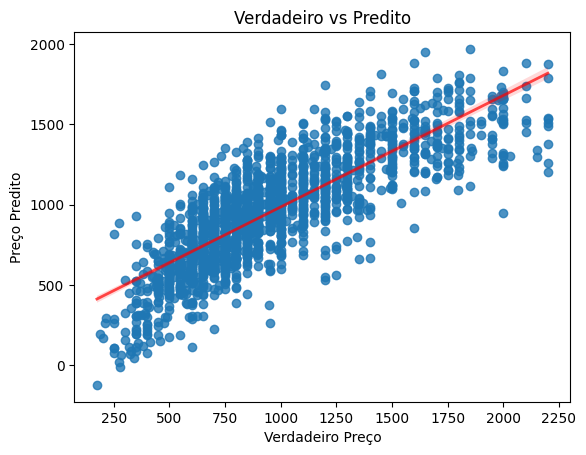

In [22]:
# Plotando o gráfico
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Verdadeiro Preço')
plt.ylabel('Preço Predito')
plt.title('Verdadeiro vs Predito')
plt.show()

In [23]:
# Obtendo os coeficientes da regressão linear
linear_regressor = model.named_steps['regressor']
coef = linear_regressor.coef_
intercept = linear_regressor.intercept_

In [24]:
intercept

936963789172360.9

In [25]:
coef

array([ 1.07911328e+02,  1.84079030e+00, -3.04963013e+02, -9.84149129e+01,
        1.46885253e-01,  7.11418528e+01,  1.04372299e+01,  3.22610420e+01,
        7.10540031e+00,  2.31982557e+01,  1.06249497e+01,  3.89206293e+01,
        1.75117413e-01,  2.65578945e+01,  6.84475329e+00, -2.76261751e+12,
        6.73271505e+01,  3.66960392e+14, -9.35134590e+14,  8.41009859e+14,
        7.45293899e+13, -5.29596331e+14, -4.94797872e+14, -3.08510567e+14,
       -5.37778432e+14,  6.39520878e+14,  5.37096354e+14, -3.78346548e+14,
        1.17841514e+14, -6.36275996e+15,  2.18837451e+15,  8.99450493e+14,
        1.20458927e+15, -1.26181534e+14, -5.74094307e+14, -8.12443650e+14,
        9.82434035e+14,  7.77646526e+13, -2.56479468e+14,  4.36120889e+13,
        4.98953176e+14, -1.23714563e+15, -1.52127513e+14, -2.67713483e+12,
       -1.33299851e+15,  2.30043436e+14, -9.08733389e+12, -9.08733389e+12,
       -9.08733389e+12, -4.59650834e+14,  7.12256051e+14, -3.09378951e+14,
       -9.82982295e+14, -

In [26]:
# Obtendo os nomes das colunas após o one-hot encoding
one_hot_columns = list(model.named_steps['preprocessor'].
                       named_transformers_['cat'].
                       named_steps['one_hot_encoder'].
                       get_feature_names_out(object_cols))

In [27]:
# Criando uma lista com todos os nomes das colunas
all_columns = numeric_cols + one_hot_columns

# Imprimindo a equação da regressão
equation = "Preco = " + str(intercept)
for i in range(len(coef)):
    equation += " + " + str(coef[i]) + "*" + all_columns[i]

print("A equação da regressão é:")
print(equation)

A equação da regressão é:
Preco = 936963789172360.9 + 107.91132813388418*Valor_Area_util_do_imovel + 1.840790302979883*Numero_Andar_do_imovel + -304.96301317918767*Latitude_imovel + -98.41491287838313*Longitude_imovel + 0.14688525347360404*Tipo_de_Construcao + 71.14185277079267*Numero_de_Banheiros + 10.43722986467493*Possui_Jardim + 32.261042035049776*Possui_Elevador + 7.105400305721169*Possui_Estacionamento + 23.198255698403806*Possui_Piscina + 10.624949746343791*Possui_Terraco + 38.9206293293744*Numero_de_Quartos + 0.1751174127656725*Indicador_Anuncio_possui_planta_baixa + 26.55789447682734*Numero_de_fotos_do_anuncio + 6.8447532903187*Numero_de_videos_do_anuncio + -2762617506886.6772*Tipo_de_Operacao + 67.32715052973555*Tipo_de_proprietario + 366960392317840.75*Numero_Faixa_Etaria_0-14 + -935134590304019.8*Numero_Faixa_Etaria_15-64 + 841009859197260.8*Numero_Faixa_Etaria_>65 + 74529389930252.02*Percentual_Faixa_Etaria_0-14 + -529596331152684.56*Percentual_Faixa_Etaria_15-64 + -494797

In [30]:

# Obtendo os coeficientes da regressão linear e ordenando em ordem decrescente
coef = linear_regressor.coef_
sorted_indices = np.argsort(np.abs(coef))[::-1]

print("As 10 características mais importantes são:")
for i in range(60):
    print(f"{all_columns[sorted_indices[i]]}: {coef[sorted_indices[i]]}")


As 10 características mais importantes são:
Quantidade_Escolas_Ciclo_1_(6-10_anos): -6362759955873053.0
Quantidade_Escolas_Ciclo_2_(10-12_anos): 2188374505017172.8
Distrito_do_imovel_PORTALEGRE: 1593135096390180.0
Ranking_Geral: -1332998514230198.5
Distancia_dirigindo_de_Lisboa_Portugal: -1237145632661275.2
Distrito_do_imovel_LISBOA: -1236491558890000.5
Quantidade_Shows_Exibicoes_Teatro: 1204589267981935.0
Distrito_do_imovel_LEIRIA: 1007072379272141.8
Distrito_do_imovel_CASTELO BRANCO: -982982295480430.8
Percentual_Poder_de_Compra: 982434034937718.5
Distrito_do_imovel_EVORA: -971794892001800.0
Numero_Faixa_Etaria_15-64: -935134590304019.8
Quantidade_Escolas_Ciclo_3_(13-15_anos): 899450493419177.8
Numero_Faixa_Etaria_>65: 841009859197260.8
Percentual_Desempregados: -812443649835887.8
Distrito_do_imovel_BEJA: 712256051477031.6
Quantidade_Hospitais_(Particulares_e_Publicos): 639520877589499.9
Distrito_do_imovel_VISEU: 600857247877111.9
Renda_Media_Mensal: -574094306903219.1
Distrito_do_im

## Random Forest



In [31]:
# Criando o modelo de regressão linear
from sklearn.ensemble import RandomForestRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100,random_state=42))
])

In [32]:
# Treinamento
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   MeanMedianImputer(variables=['Valor_Area_util_do_imovel',
                                                                                                'Numero_Andar_do_imovel',
                                                                                                'Latitude_imovel',
                                                                                                'Longitude_imovel',
                                                                                                'Tipo_de_Construcao',
                                                                                                'Numero_de_Banheiros',
                                                                                                'Possui_Jardim',
                                                                                                'Possui_Elevador',
                                                                                                'Possui_Estacionamento',
                                                                                                'Possui_Piscina',
                                                                                                'Possui...
                                                   'Quantidade_Escolas_Ciclo_1_(6-10_anos)', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Indicador_de_Elevador',
                                                   'Distrito_do_imovel',
                                                   'Tipo_de_Certificacao_Energetica',
                                                   'Faixa_Area_util',
                                                   'faixa_area_construida'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
# Previsões
y_pred = model.predict(X_test)
y_esperado = y_test.copy()

In [34]:
# Métricas de desempenho
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 38730.822023885354
RMSE: 196.80147871366555
MAE: 140.42385350318474
R^2: 0.7478263192699387


**MSE:40674.87**: pode ser considerado alto ou baixo dependendo da escala dos valores de aluguel em seu conjunto de dados. A vantagem do MSE é que ele penaliza grandes erros de forma mais dura do que pequenos erros, devido ao termo quadrático.

**RMSE (Raiz do Erro Quadrático Médio): 201.680130277539**: Nesse caso significa que, em média, o modelo erra o valor do aluguel por aproximadamente 201.68 euros. O RMSE dá uma boa ideia da magnitude do erro.

**MAE (Erro Médio Absoluto): 142.06901208617973**:O MAE é a média dos valores absolutos dos erros. Ele fornece uma medida direta do erro médio em termos da variável de destino. Neste modelo tem, em média, um erro de 142.07 euros ao prever o valor do aluguel. A vantagem do MAE é que ele é menos sensível a erros extremos do que o MSE ou RMSE.

**R^2 (Coeficiente de Determinação): 0.7412143243268486**: O modelo está razoavelmente bom, explicando 74.12% da variação nos preços dos aluguéis. No entanto, há um erro médio de cerca de 201.68 euros (baseado no RMSE) nas previsões de aluguel.por exemplo, um erro de 201.68 euros pode ser aceitável para propriedades de alto valor, mas não para propriedades de baixo custo.









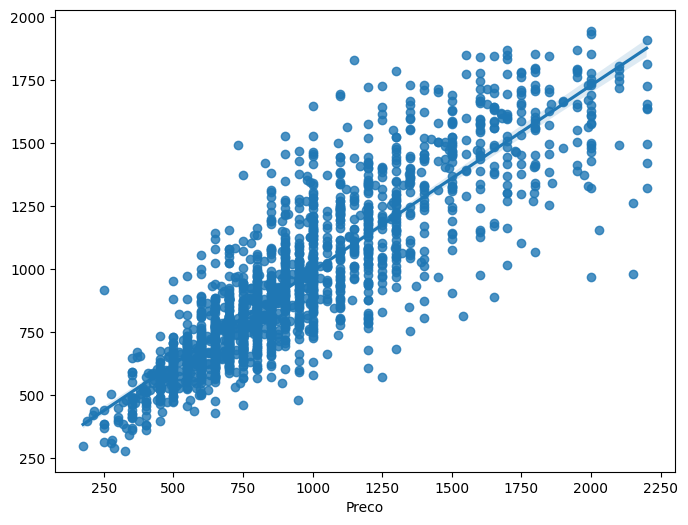

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(data=df_final, x= y_esperado, y=y_pred, ax=ax);